In [1]:
import obspy as obs
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from scipy.fft import fft as fft,fftfreq
import pandas as pd

In [2]:
def fftthis(st):
    T = 1.0 / 100.0
    N = len(st)
    yf = fft(st)
    yf = np.abs(yf)[:N//2]
    xf = fftfreq(N,T)[:N//2]
#     yf = 10.0/N * np.abs(yf[0:N//2])
    return xf, yf

In [3]:
def integral(st,waktu):
    inte = []
    for i in range(len(waktu)):
        inte.append(st[i]*waktu[i])
    return inte

In [4]:
dft = [3.7,2.4,0.9,1.6,0.4,1.2,0.1,-0.4]

In [5]:
xf,yf = fftthis(dft)
yf-1.5

array([8.4       , 2.60571101, 2.42045916, 2.63317518])

In [8]:
df = pd.read_table(r'C:\Users\bimoi\Documents\Coding\Jupyter_Notebook\SeismologiTerapan\Data\KYT_EW.dat', sep="\s+", usecols=['time', 'ew', 'ns', 'ud'])
df

,time,ew,ns,ud
0,0.00,-0.2677,0.3616,1.5247
1,0.01,0.2666,-0.0599,1.4873
2,0.02,0.5248,-0.9463,1.1525
3,0.03,0.2895,-1.1511,0.9189
4,0.04,-0.3757,-0.5882,1.2519
...,...,...,...,...
11995,119.95,0.1395,0.2141,-0.1485
11996,119.96,0.0696,0.1804,-0.1345
11997,119.97,0.0603,0.2086,-0.1807
11998,119.98,0.0582,0.1652,-0.1640


In [9]:
df.ew.values[2000:]

array([-0.9865, -0.5221,  0.1669, ...,  0.0603,  0.0582,  0.    ])

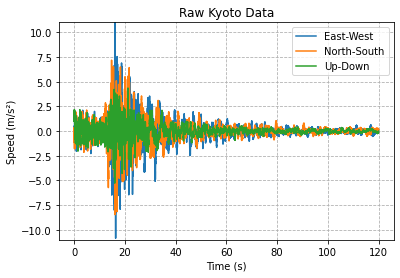

In [16]:
plt.plot(df.time.values,df.ew.values,label="East-West")
plt.plot(df.time.values,df.ns.values,label="North-South")
plt.plot(df.time.values,df.ud.values,label="Up-Down")

plt.ylim([-11,11])
plt.title('Raw Kyoto Data')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s\u00b2)')
plt.grid(which='both', ls='--')
plt.legend()
plt.savefig("Raw Kyoto Data.png")
plt.show()

(-11.0, 11.0)

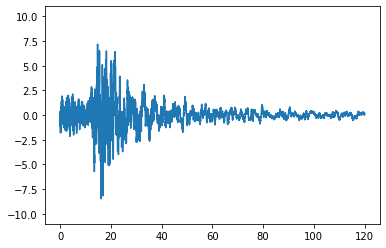

In [21]:
plt.plot(df.time.values,df.ns.values)
plt.ylim([-11,11])

(-11.0, 11.0)

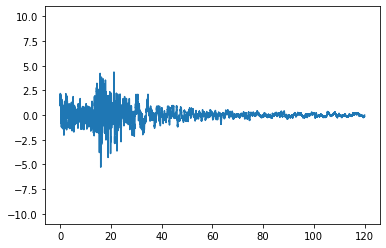

In [22]:
plt.plot(df.time.values,df.ud.values)
plt.ylim([-11,11])

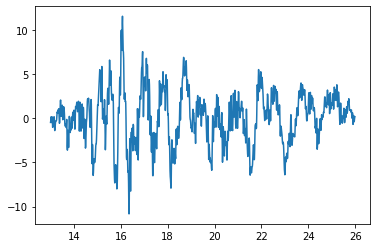

In [23]:
plt.plot(df.time.values[1300:2600],df.ew.values[1300:2600])

C:\Users\bimoi\AppData\Local\Temp\ipykernel_6464\352599277.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(xew), np.log10(yew),label="East-West FFT")


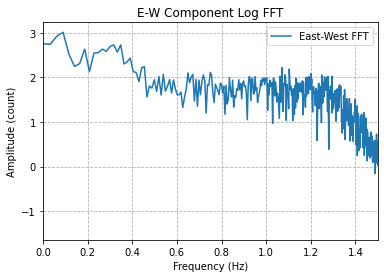

In [26]:
xew,yew = fftthis(df.ew.values[1300:2600])
plt.plot(np.log10(xew), np.log10(yew),label="East-West FFT")

plt.xlim([0,1.5])
plt.title("E-W Component Log FFT")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (count)')
plt.grid(which='both', ls='--')
plt.legend()
plt.savefig("E-W Component FFT.png")
plt.show()

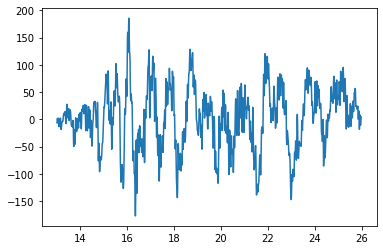

In [25]:
vel = integral(df.ew.values[1300:2600],df.time.values[1300:2600])
plt.plot(df.time.values[1300:2600],vel)

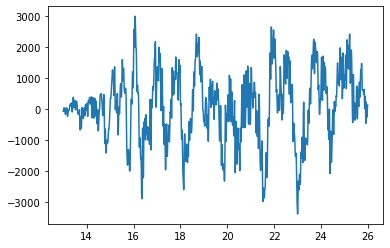

In [26]:
dis = integral(vel,df.time.values[1300:2600])
plt.plot(df.time.values[1300:2600],dis)

C:\Users\bimoi\AppData\Local\Temp\ipykernel_6464\1817731297.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(xns), np.log10(yns),label="North-South FFT")


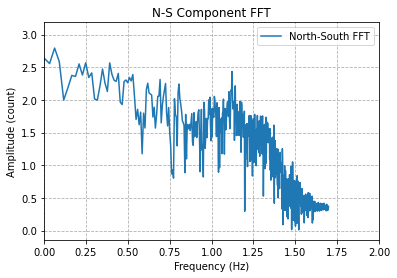

In [27]:
xns,yns = fftthis(df.ns.values[1300:2600])
plt.plot(np.log10(xns), np.log10(yns),label="North-South FFT")

plt.xlim([0,2])
plt.title("N-S Component FFT")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (count)')
plt.grid(which='both', ls='--')
plt.legend()
plt.savefig("N-S Component FFT.png")
plt.show()

C:\Users\bimoi\AppData\Local\Temp\ipykernel_6464\1055406460.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(xud), np.log10(yud),label="Up-Down FFT")


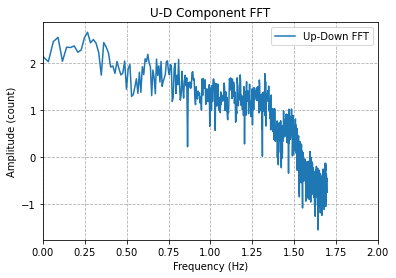

In [28]:
xud,yud = fftthis(df.ud.values[1300:2600])
plt.plot(np.log10(xud), np.log10(yud),label="Up-Down FFT")

plt.xlim([0,2])
plt.title("U-D Component FFT")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (count)')
plt.grid(which='both', ls='--')
plt.legend()
plt.savefig("U-D Component FFT.png")
plt.show()

# HVSR

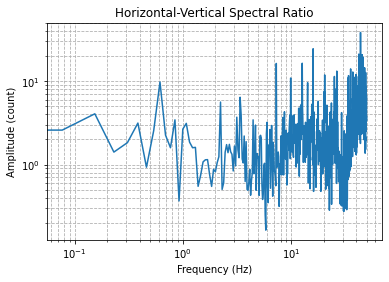

In [30]:
horizontal = np.sqrt(yns**2+yew**2)/2
hvsr = horizontal/yud
plt.plot(xud, hvsr)
plt.xscale('log')
plt.yscale('log')
plt.title("Horizontal-Vertical Spectral Ratio")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (count)')
plt.grid(which='both', ls='--')
plt.savefig("Horizontal-Vertical Spectral Ratio.png")
plt.show()

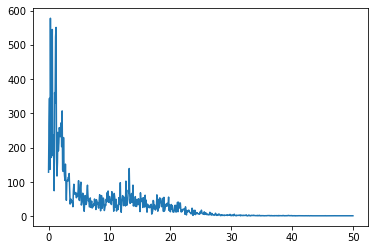

In [31]:
plt.plot(xud,horizontal)